# Generalisation, underfitting and overfitting

**NOTES**
- Usually collecting more data points yields more variety, and therefore allows for more complex models
- For the KNeighbours algorithm, using n=1 results in a more complex model, while using a higher value for n will create a more smooth line, and therefore a less complex model
- The **stratify parameter ensures that the splitting process preserves the proportion of classes in the target variable** (in this case, cancer.target) in both the training and testing datasets.
- While the nearest K-neighbour algorithm is easy to understand, it is not often used in practice due to the prediction being slowe and its inabilitity to handle many features. It also doesn't work well in DS where features are 0 most of the time (sparse datasets)
- For K-neighbours, you can also use other ways to measure the distance (by default, Euclidian distance is used)
- L1 Lasso, L2 ridge
- For linear models, Ridge is mostly used compared to Lasso. However if you have a high number of features and expect some of them to have no effect, you could use :assp



## Sample dataset


X.shape is (26, 2)


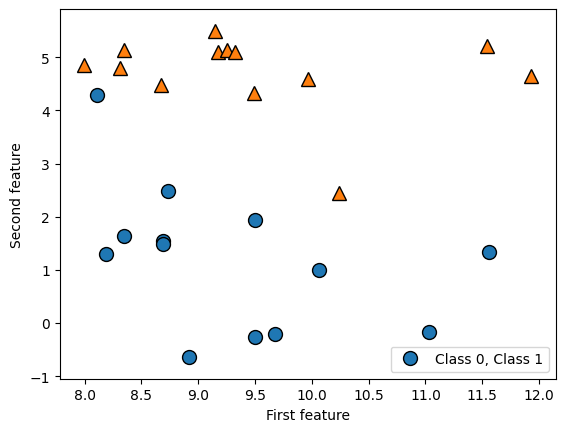

In [2]:
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer #dataset used in the examples

# Generate dataset
X, y = mglearn.datasets.make_forge()


# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0, Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"X.shape is {X.shape}")



In [3]:
# inspecting the 'breast cancer DS' we will use

#loads DS
cancer = load_breast_cancer()
print(f"DATASET CANCER keys {cancer.keys()}")


# gets DS data shape
print(f"The shape of cancer data: {cancer.data.shape}")

# Checks how many malignant and benign points
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


# Checks features names
print(f"Features names\n {cancer.feature_names}")

DATASET CANCER keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
The shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Features names
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 2.1 Analysing KNeighbours Classifier

In [4]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print(f"The accuracy score is {knn.score(X_test, y_test):.2f}")

The accuracy score is 0.86


For two-dimension datasets, we can plot graphs to help visualise the 'decision boundary', which is the divide the algorithm uses

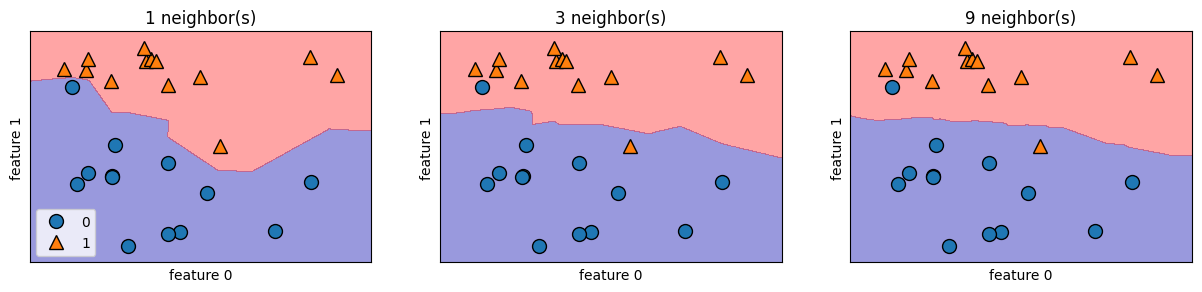

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for n_neighbors, ax in zip([1,3, 9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Now we will check the performace with different number of neighbours.

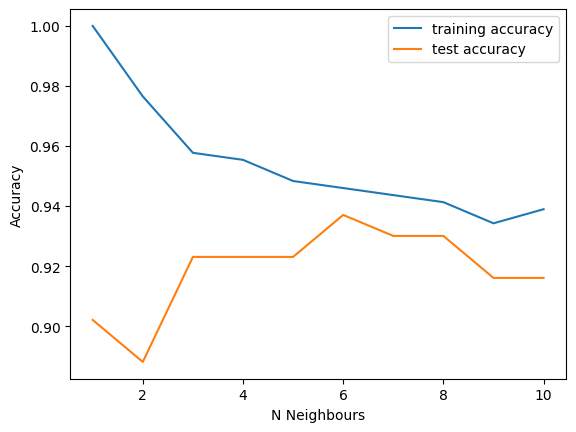

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbours from 1 to 10
neighours_range = range(1,11)

for n in neighours_range:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighours_range, training_accuracy, label="training accuracy")
plt.plot(neighours_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N Neighbours")
plt.legend()

## 2.2 Linear Models

- Linear regression, is also known as ordinary least squares (OLS). This model has no parameters.
- Linear regression finds the parameters w and b that minimise the mean squared error between y and y-hat.
- SCORE (default mode to evalue the model) = R-squared, values between 0-1, while 1 indicates a better model
- Given a model lg, w (the slope,  where is crosses x-axis), is stored at the model lg.coef_; The intercept b( where crosses y axis), is stored at lg.intercept_
- If the model has a much better score for the training set than than the test set, we have a sign of overfitting

In [7]:
from sklearn.linear_model import  LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=42)

lg = LinearRegression().fit(X_train, y_train)

print(f"Coeficients: {lg.coef_}")
print(f"Intercept {lg.intercept_}")

print(f"LINEAR REG training score {lg.score(X_train, y_train):.2f}")
print(f"LINEAR REG test score {lg.score(X_test, y_test):.2f}")


Coeficients: [-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 -1.10315060e+01  1.15584830e+00 -8.37313259e-01
 -7.89905136e+00  6.27950290e+00 -1.09538327e+01 -2.48389637e+01
 -1.16316264

### 2.2.1 Ridge regression
- Ridge is a linear regression model, with regularisation (L2 regularisation).
- It regularises the values of the coeficiens, so they have the values as close to zero as possible.
- Ridge is less likely to overfit compared to traditional linear model
- In ridge you can manipulate the parameter alpha. The higher the value of alpha, the more coefficients are restricted - they will go towards zero. the default value for alpha is 0.1. If you have alpha=0, you basically have a simple linear regression
- When you decrease training set performance, but increase test set performance, you have a better generalisation
- With enough training data regularisation becomes less important

In [8]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.05).fit(X_train, y_train)

print(f"RIDGE training score {ridge.score(X_train, y_train):.2f}")
print(f"RIDGE test score {ridge.score(X_test, y_test):.2f}")

# Ps: this is a simple dataset, with a more complex like the Boston dataset we set more differences in the values

RIDGE training score 0.92
RIDGE test score 0.82


### 2.2.2 Lasso regression

- Also known as L1 regularisation
- In Lasso, some coefficients will actually be zero. This means some features will be ignored by the model
- Using less features makes the model potentially easier to intepret

In the example below, the first model does quite badly for both training and test sets, which indicates it is underfitting.
**To reduce underfitting, we can decrease alpha; when we do this we need to increase the default setting of max_iter**

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print(f"LASSO training score {lasso.score(X_train, y_train):.2f}")
print(f"LASSO test score {lasso.score(X_test, y_test):.2f}")

# since some features will be given the value of zero, and therefore ignored,
# this lines shows the number of features actually used in the model
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

LASSO training score 0.27
LASSO test score 0.26
Number of features used: 3


In [11]:
# we increase the default setting of max_iter
# otherwise the model would wanr us that we should increase max_iter

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print(f"LASSO alpha=0.01 train score {lasso001.score(X_train, y_train):.2f}")
print(f"LASSO alpha=0.01 test score {lasso001.score(X_test, y_test):.2f}")

print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")


print("|---------------------|")

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)

print(f"LASSO alpha=0.001 train score {lasso0001.score(X_train, y_train):.2f}")
print(f"LASSO alpha=0.001 test score {lasso0001.score(X_test, y_test):.2f}")

print(f"Number of features used: {np.sum(lasso0001.coef_ != 0)}")

LASSO alpha=0.01 train score 0.89
LASSO alpha=0.01 test score 0.80
Number of features used: 34
|---------------------|
LASSO alpha=0.001 train score 0.93
LASSO alpha=0.001 test score 0.82
Number of features used: 73


## 2.3 Logistic Regression for Classification